## Introduction

Diabetes accounts for 1 in 4 health care dollars in the U.S., and more than half of that expenditure is directly attributed to diabetes. In 2012, an estimated $25 billion was due to 30-day readmissions associated with hospitalisation. Therefore the goal of this data project was to uncover any other factors that may contribute to re-admission and whether we are able to predict 30-day readmission based on this information. If there is potential to greatly reduce readmissions then there would be mammoth savings in healthcare costs, reducing adverse outcomes while simultaneously improving the health care system

In [160]:
# Loading required libraries  

import pandas as pd
import numpy as np
import matplotlib as plt


In [161]:
# Import diabetic data CSV into dataframes
df = pd.read_csv("dataset_diabetes/diabetic_data.csv", header=0)

# Check
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [164]:
# Check More Detailed Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [165]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [166]:
# issue with dtype, check dtypes

df.dtypes


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## On First Exmination

It seemed like there were no null values but on closer inspection missing values were labelled with a question mark "?". Therefore these would need to examined.


In [167]:

# Check how many missing "?" fields there are for each attribute

for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())


race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [168]:
# Dropping columns with large number of missing values (Over 40% missing)

df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)
df.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [169]:


for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())


race 2273
gender 0
age 0
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [170]:
# Keep the rest of data by replacing missing values with np.NaN

missing_data = ["?", "NA", "nan"]
df2 = df1.replace(missing_data, np.NaN)

# check through missing ? fields again
for col in df2.columns:
    if df2[col].dtype == object:
         print(col,df2[col][df2[col] == '?'].count())


race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


array([[<AxesSubplot:title={'center':'encounter_id'}>,
        <AxesSubplot:title={'center':'patient_nbr'}>,
        <AxesSubplot:title={'center':'admission_type_id'}>,
        <AxesSubplot:title={'center':'discharge_disposition_id'}>],
       [<AxesSubplot:title={'center':'admission_source_id'}>,
        <AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>,
        <AxesSubplot:title={'center':'number_inpatient'}>],
       [<AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

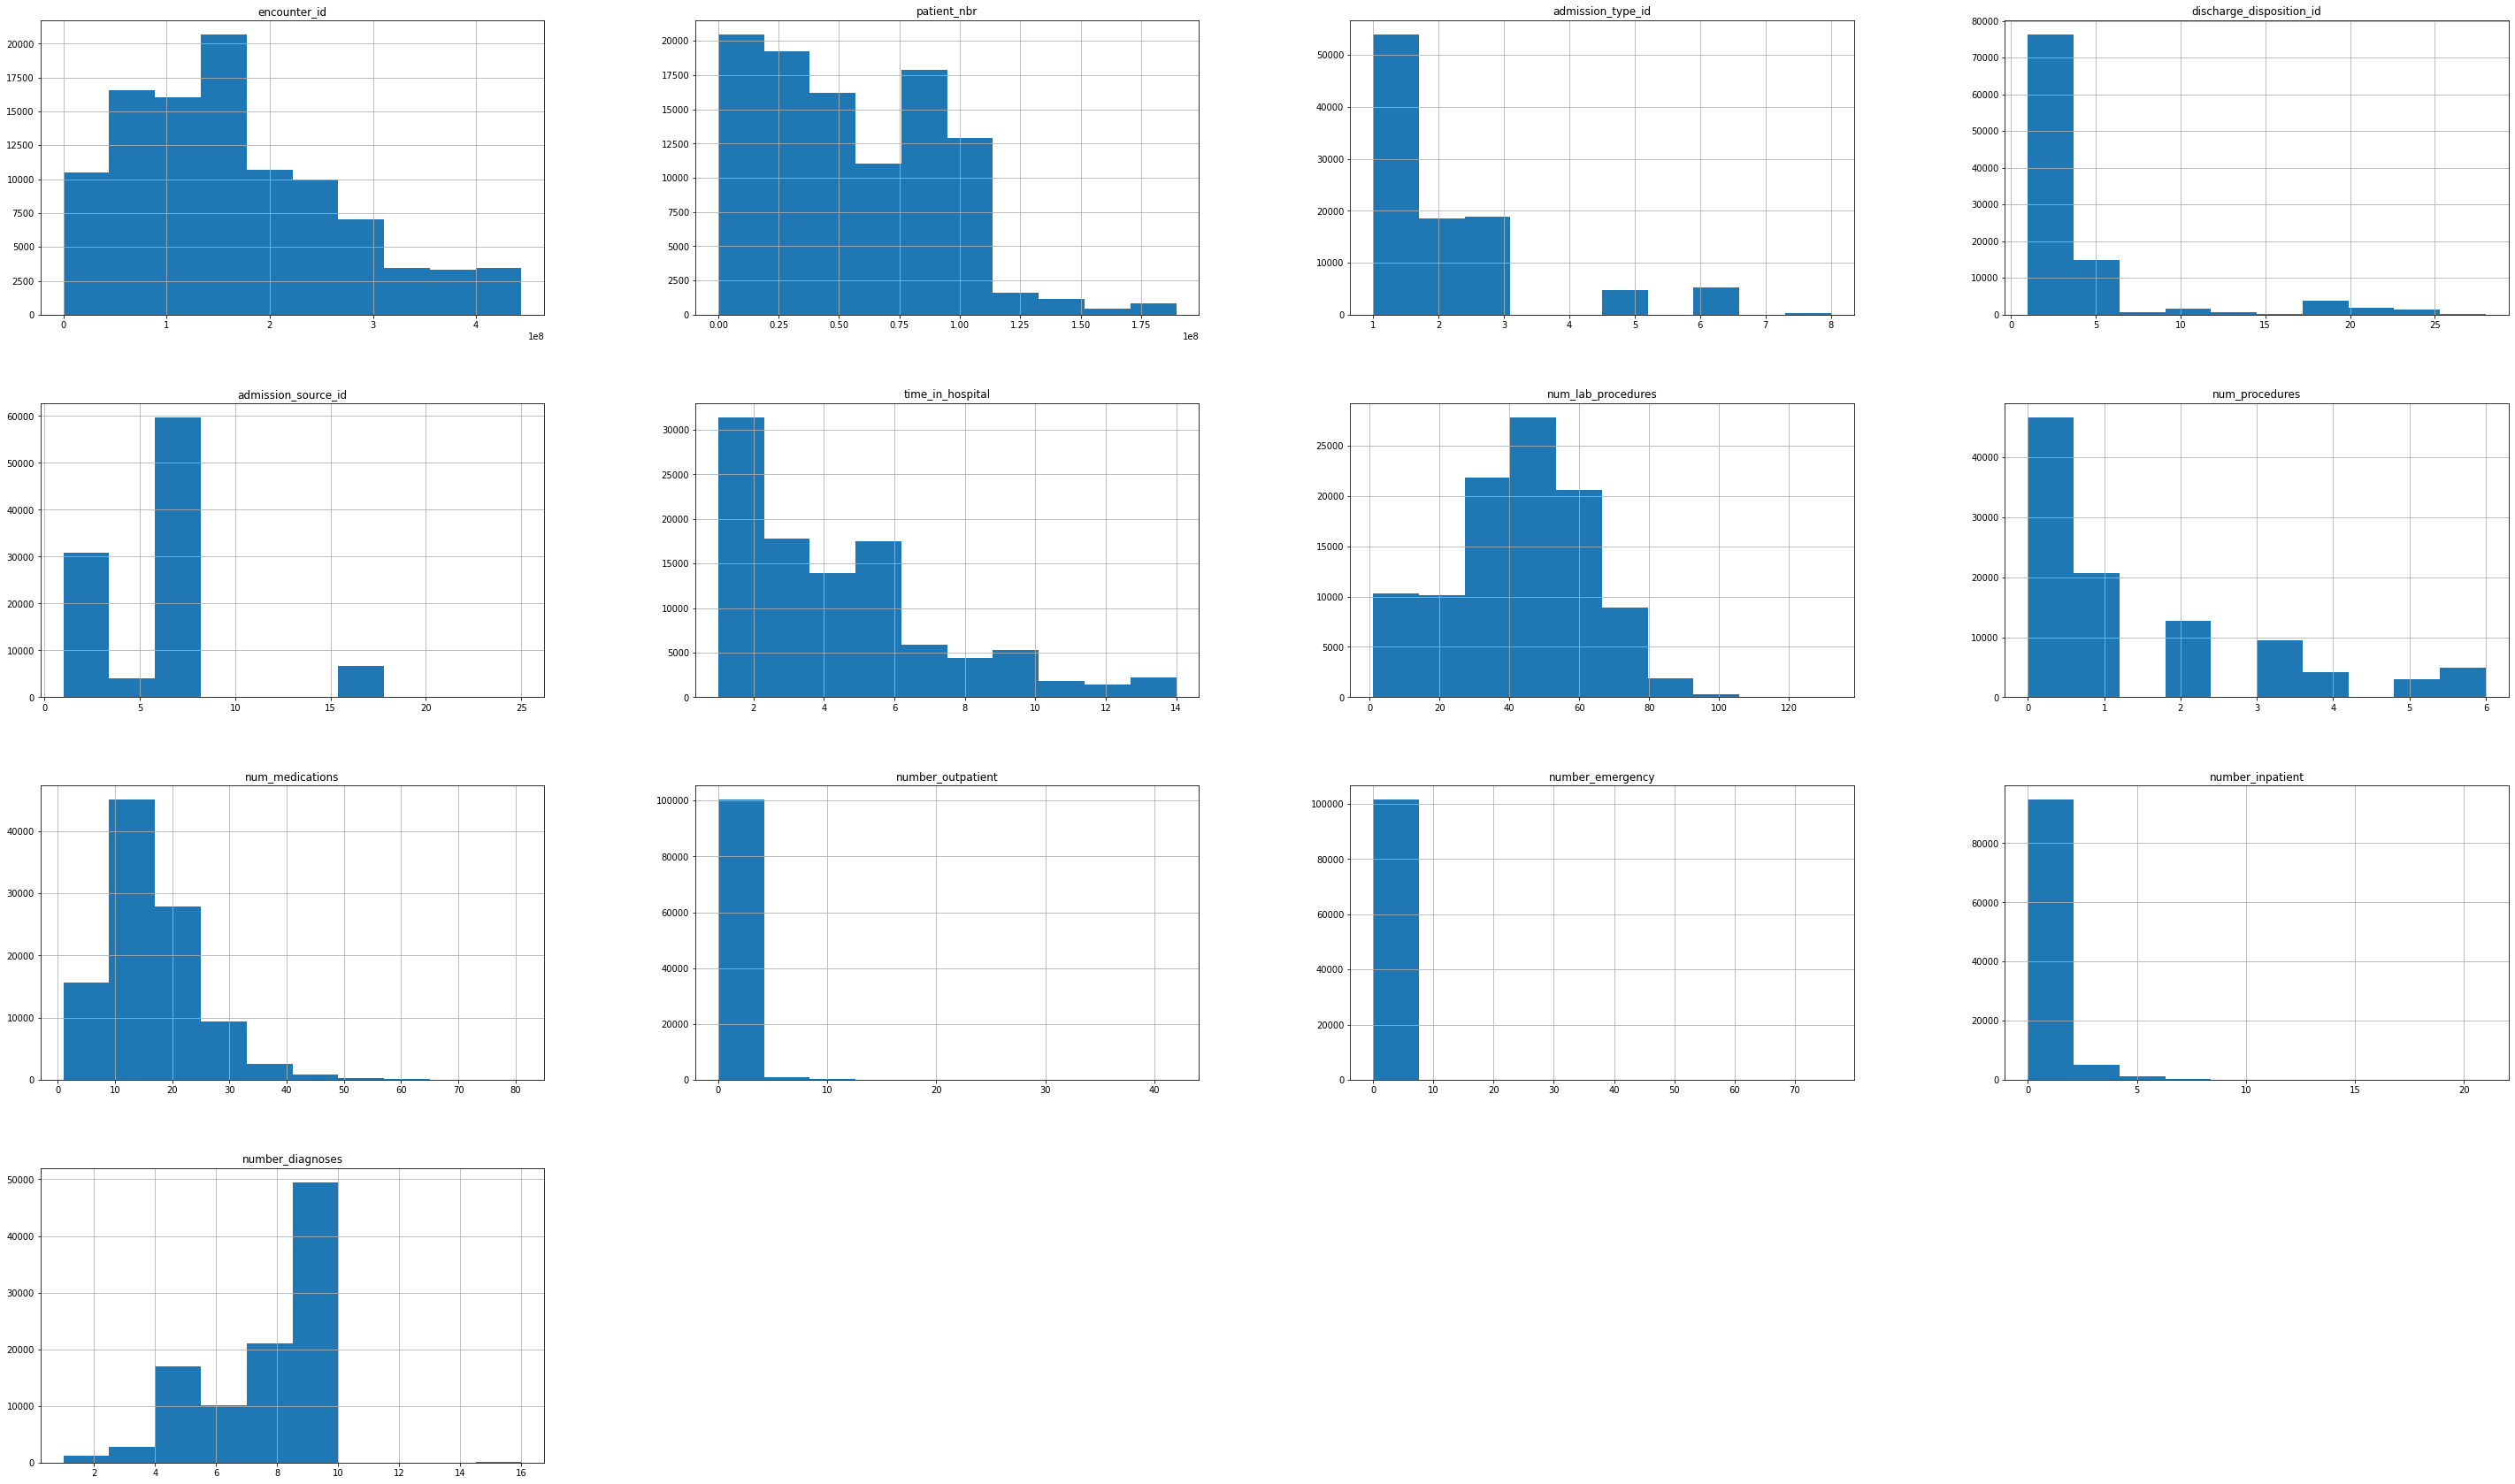

In [171]:
# Plot histogram for each applicable attribute

hist = df.hist(figsize=(50,30))
hist

In [172]:



# Count up frequency of given medication & sort values by index
df_med = df['num_medications'].value_counts().reset_index().sort_values(by=['index'])

# Re-order columns
med_counts = df_med[['index', 'num_medications']]

med_counts

,index,num_medications
36,1,262
31,2,470
26,3,900
23,4,1417
19,5,2017
...,...,...
69,72,3
74,74,1
70,75,2
73,79,1


In [173]:

# Count up frequency of given medication & sort values by index

df_lab = df['num_lab_procedures'].value_counts().reset_index().sort_values(by=['index'])

# Re-order columns
med_counts = df_lab[['index', 'num_lab_procedures']]

df_lab


,index,num_lab_procedures
0,1,3208
39,2,1101
61,3,668
71,4,378
78,5,286
...,...,...
112,120,1
113,121,1
116,126,1
115,129,1


## Quick View

There was  an outlier for the number of lab procedures for patients that only stayed for 1
day. This was an odd result as it was also the mode. This may be because the majority of patients
stayed 1 day for a check up which is more common than overnight stays.

Therefore it was inspected closer 

<AxesSubplot:xlabel='index'>

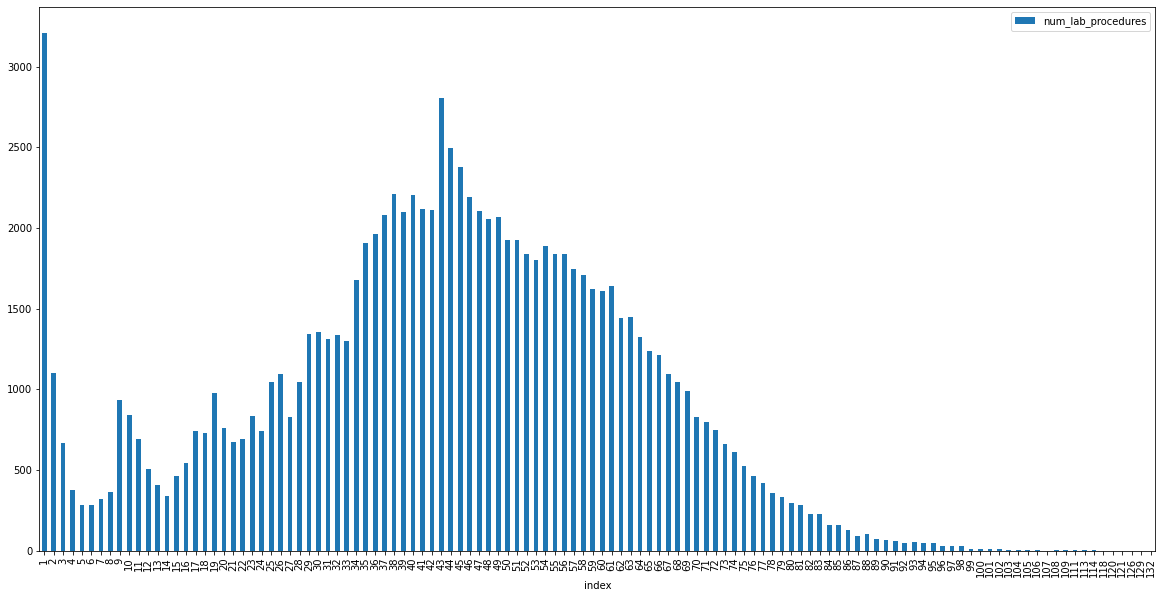

In [174]:

df_lab.plot.bar(x='index', y='num_lab_procedures')




In [175]:
df['time_in_hospital'].mode()

0    3
dtype: int64

In [176]:
df['num_procedures'].mode()

0    0
dtype: int64

In [177]:

df['num_lab_procedures'].mode()


0    1
dtype: int64

In [178]:
df['num_medications'].mode()

0    13
dtype: int64

<AxesSubplot:xlabel='index'>

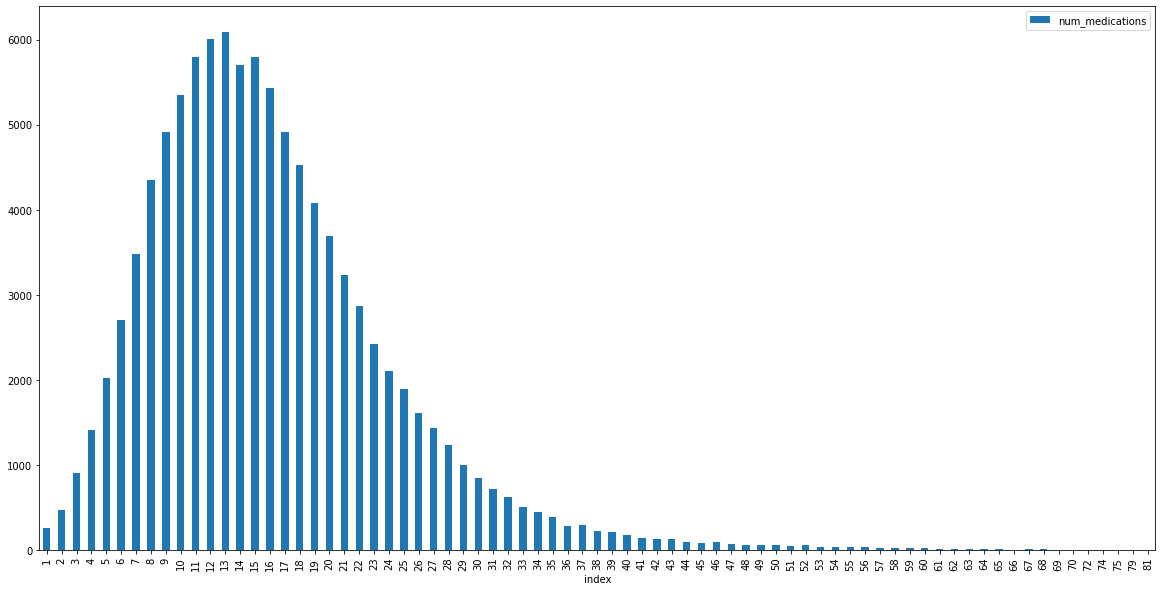

In [179]:
# Closer Histogram medication count 

df_med.plot.bar(x='index', y='num_medications')

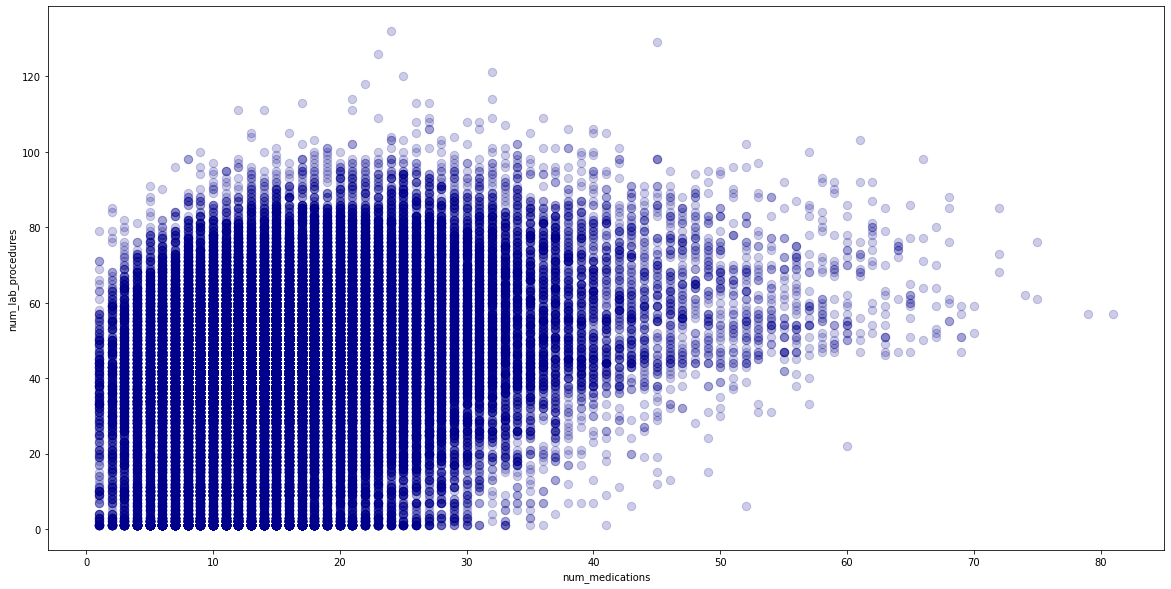

In [180]:
# scatter diagram 
plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df.plot.scatter(y='num_lab_procedures',
                      x='num_medications',
                      c='DarkBlue', s=70, alpha=0.2)

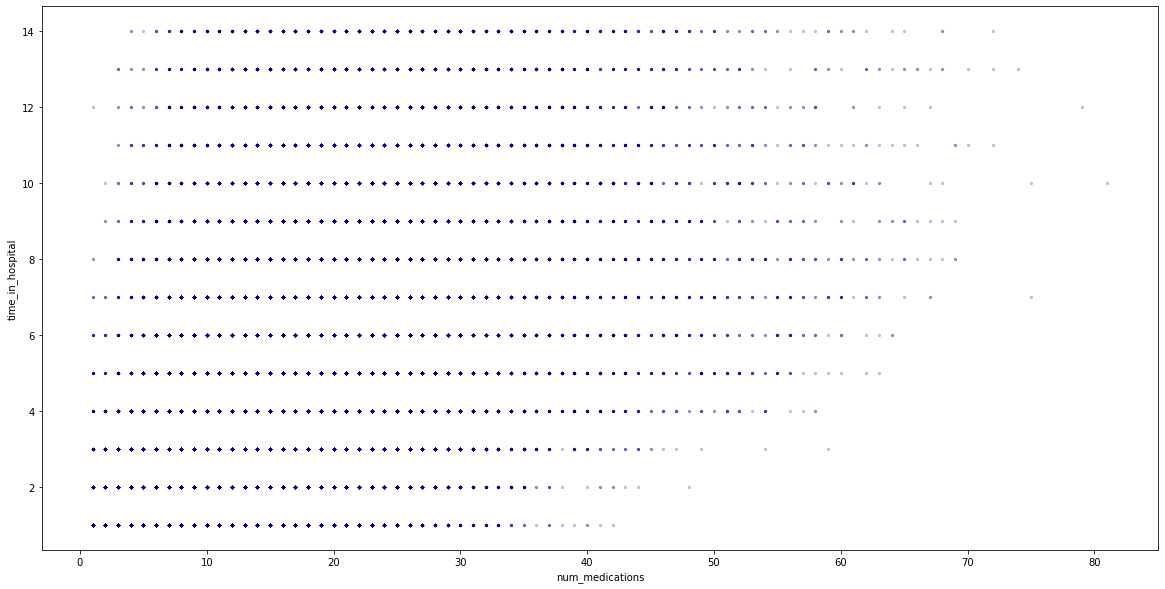

In [181]:
# Time in hospital / Number of Medications  

plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df.plot.scatter(y='time_in_hospital',
                      x='num_medications',
                      c='DarkBlue', s=5, alpha=0.2)

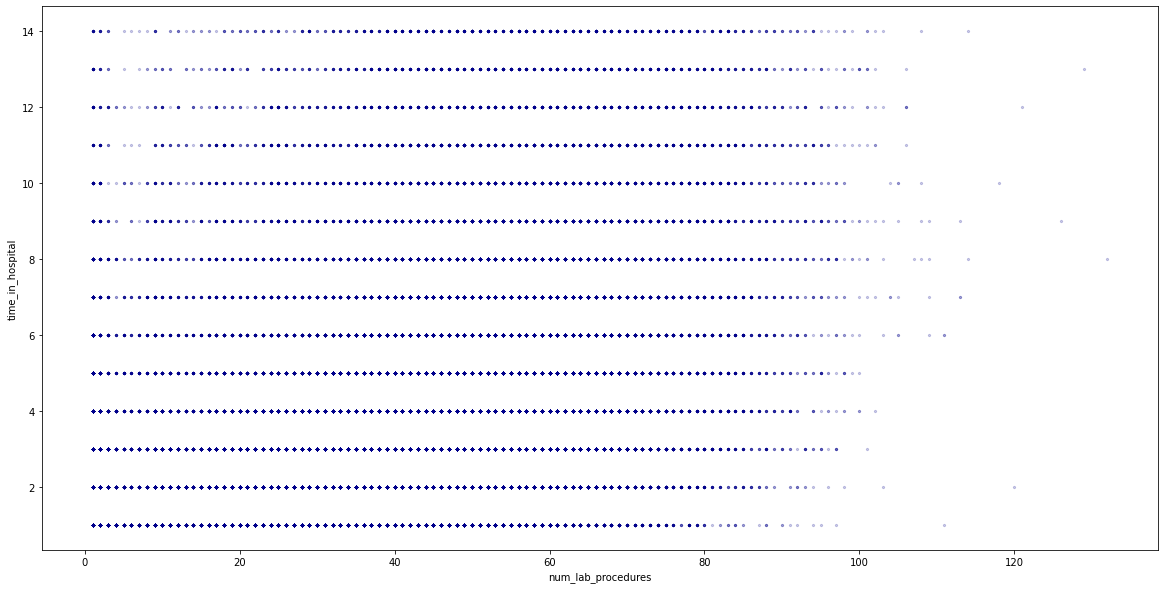

In [182]:
# Time in hospital / Lab Procedures

plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df.plot.scatter(y='time_in_hospital',
                      x='num_lab_procedures',
                      c='DarkBlue', s=5, alpha=0.2)

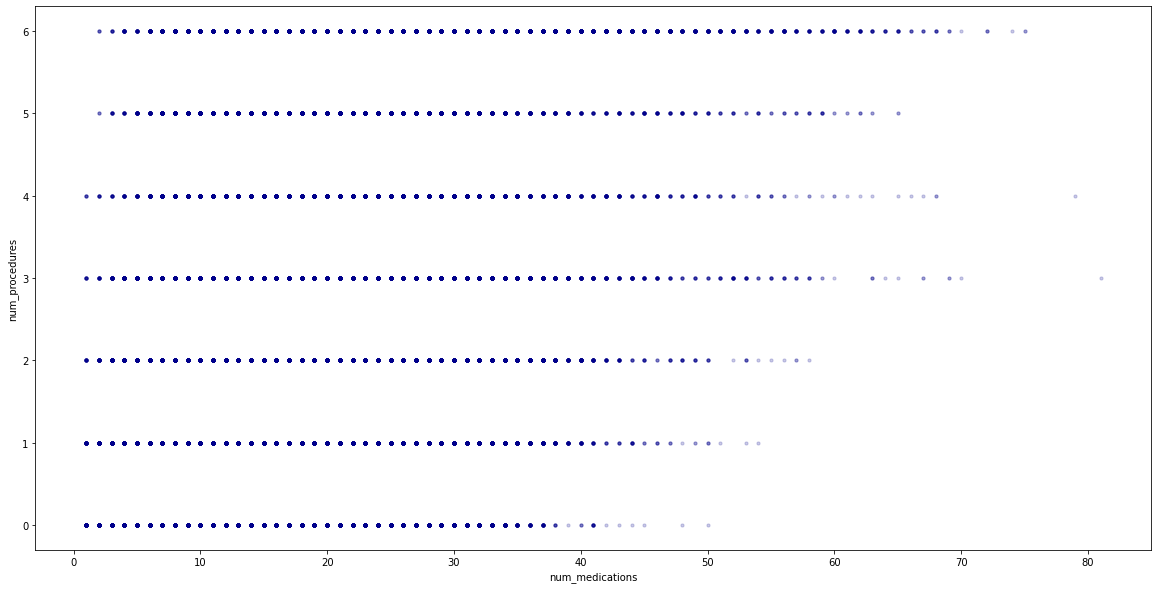

In [183]:
# Time in hospital / Number of Procedures

plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df.plot.scatter(x='num_medications',
                      y='num_procedures',
                      c='DarkBlue', s=10, alpha=0.2)

In [184]:
# calculate standard deviation for all applicable columns 

df.std(axis = 0, skipna = True)


encounter_id                1.026403e+08
patient_nbr                 3.869636e+07
admission_type_id           1.445403e+00
discharge_disposition_id    5.280166e+00
admission_source_id         4.064081e+00
time_in_hospital            2.985108e+00
num_lab_procedures          1.967436e+01
num_procedures              1.705807e+00
num_medications             8.127566e+00
number_outpatient           1.267265e+00
number_emergency            9.304723e-01
number_inpatient            1.262863e+00
number_diagnoses            1.933600e+00
dtype: float64

The standard deviation for time in hospital and number of
non-lab procedures showed quite a low variation of 2.9 and 1.7 compared to the number of lab
procedures and medication at 19 and 8 which meant time spent in hospital was quite close to the
mean. 

## Descriptive Stats Analysis

Change in medication was plotted against 30-day readmission to see whether they
impacted eachother but the points were barely visible and on closer inspection the values were
both binary variables therefore should not be used for scatter graphs or linear regression as one
variable needs to be independent and continuous.
It was concluded that no further analysis was to be done to change in medication x readmission due to inapplicable dataset and that the number of treatments did not affect hospital stay but as the graphs were overplotted there is potential to dive deeper using other analysis methods.

A histogram was used to determine the distribution of frequency. All the graphs resulted in
similar positively right skewed graph shapes showing there may be similarities between the
number of treatments perhaps showing correlation which needed to be analysed further.

The most similar shaped histograms were also plotted against each other to gage any relationship
between them in a scatter graph: time in hospital against the number of medications showed
no correlation or very very weak positive. But this was hard to decipher due to large amounts of
data resulting in overplotting. Thus this graph shows the number of medications does not affect
the length of time in hospital.

In [185]:
# Clean the age table to make brackets consistent 

df2['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [186]:
# checking random medication values 
df2['rosiglitazone'].value_counts()


No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

In [187]:
# checking race values 
df2['race'].value_counts()


Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [188]:
# checking gender values 
df2['gender'].value_counts()


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [189]:
# replace yes = 1 and no = 0 in diabetesMed
df2['diabetesMed'] = df2['diabetesMed'].replace(['Yes','No'],['1', '0'])

# replace ch = 1 and no = 0 in change
df2['change'] = df2['change'].replace(['Ch','No'],['1', '0'])

df2.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,0,0,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,1,1,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,0,1,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,1,1,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,1,1,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,0,1,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,Steady,No,No,No,No,No,1,1,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,No,No,0,1,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,1,1,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,1,1,NO


In [190]:
# Check values via count

df2['insulin'].value_counts()

df2['readmitted'].value_counts()


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [191]:
# Drop all patients who have been readmitted over 30 days 
# df2.drop(df2.loc[df2['readmitted'] == '>30'].index, inplace=True)
# df2['readmitted'].value_counts()


In [192]:
# Change No = 0 and under 30 day readmissions = 1 

df2['readmitted'] = df2['readmitted'].replace(['NO','<30', '>30'],[0, 1, 0])
df2['readmitted'].value_counts()


0    90409
1    11357
Name: readmitted, dtype: int64

In [193]:
# Check counts 
df2['change'].value_counts()
df2['diabetesMed'].value_counts()


1    78363
0    23403
Name: diabetesMed, dtype: int64

In [194]:
# change No = 0 and Ch = 1 in change
df2['change'] = df2['change'].replace(['Ch','No'],[1, 0])

# change No = 0 and Yes = 1 in DiabetesMed
df2['diabetesMed'] = df2['diabetesMed'].replace(['Yes','No'],[1, 0])

# check counts 
df2['change'].value_counts()
df2['diabetesMed'].value_counts()


1    78363
0    23403
Name: diabetesMed, dtype: int64

In [195]:
# rename readmit collumn header to 30 day readmit

df2.rename(columns={'readmitted':'30_day_readmitted'}, 
                 inplace=True)

df2.reset_index()

df2

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30_day_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,1,1,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,0,1,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,1,1,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,1,1,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,0,1,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,1,1,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,1,1,0


In [196]:
df2 = df2.infer_objects()

df2.dtypes


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [197]:
# Convert all binned ICD 9 Codes to actual diagnosis names
def convertDiag(number):
    
    if str(number).startswith('V'):
        return "Influences"
    elif str(number).startswith('E'):
        return "Influences" 
        
    if float(number) <= 139:
        return "Parasite"
    elif float(number) <= 239:
        return "Neoplasms"
    elif float(number) <= 279:
        return "Immunity"
    elif float(number) <= 289:
        return "Blood"
    elif float(number) <= 319:
        return "Mental"
    elif float(number) <= 389:
        return "Nervous"
    elif float(number) <= 459:
        return "Circulatory"
    elif float(number) <= 519:
        return "Respiratory"
    elif float(number) <= 579:
        return "Digestive"
    elif float(number) <= 629:
        return "Genitourinary"
    elif float(number) <= 679:
        return "Pregnancy"
    elif float(number) <= 709:
        return "Skin"
    elif float(number) <= 739:
        return "Tissue"
    elif float(number) <= 759:
        return "Congenital"
    elif float(number) <= 779:
        return "Perinatal"
    elif float(number) <= 799:
        return "Symptons"
    elif float(number) <= 999:
        return "Injury"

# Count up all values for each diagnostic for Diag 1 
    
# df2['diag_1'].apply(convertDiag)
df2['diag_1'].value_counts()
    

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
834       1
804       1
827       1
976       1
381       1
Name: diag_1, Length: 716, dtype: int64

In [198]:
# Count up all values for each diagnostic for Diag 2
 
# df2['diag_2'].apply(convertDiag)

df2['diag_2'].value_counts()

276    6752
428    6662
250    6071
427    5036
401    3736
       ... 
130       1
968       1
871       1
137       1
270       1
Name: diag_2, Length: 748, dtype: int64

In [199]:
# Count up all values for each diagnostic for Diag 3

# df2['diag_3'].apply(convertDiag)

df2['diag_3'].value_counts()


250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
315         1
230         1
E853        1
E815        1
49          1
Name: diag_3, Length: 789, dtype: int64

In [200]:
# sum of multiple treatment columns 

df2['total_treatments'] = df2["num_medications"] + df2["num_procedures"] + df2["num_lab_procedures"]

df2['total_treatments']


0         42
1         77
2         29
3         61
4         59
          ..
101761    67
101762    54
101763    62
101764    68
101765    19
Name: total_treatments, Length: 101766, dtype: int64

In [201]:
df2.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30_day_readmitted,total_treatments
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,0,0,0,42
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,1,1,0,77
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,0,1,0,29
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,1,1,0,61
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,1,1,0,59
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,Steady,No,No,No,No,No,0,1,0,53
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,Steady,No,No,No,No,No,1,1,0,92
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,...,No,No,No,No,No,No,0,1,0,85
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,Steady,No,No,No,No,No,1,1,0,98
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,Steady,No,No,No,No,No,1,1,0,54


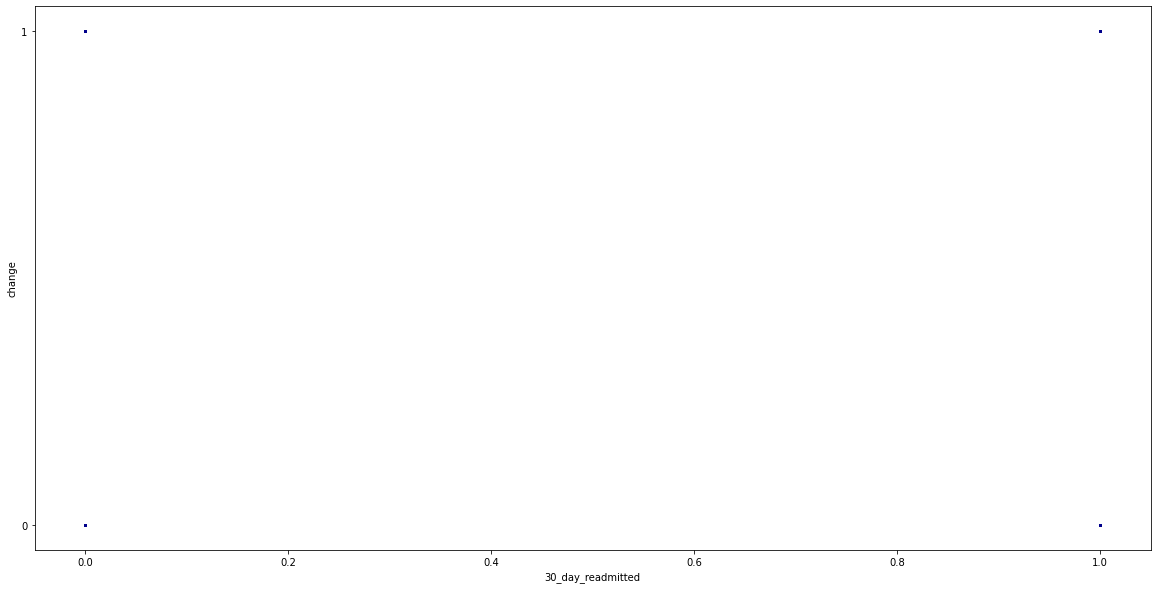

In [202]:
# Time in hospital / Number of Procedures

plt.rcParams['figure.figsize'] = [20, 10]

ax1 = df2.plot.scatter(y='change',
                      x='30_day_readmitted',
                      c='DarkBlue', s=1, alpha=0.2)

In [203]:
df2['30_day_readmitted'].value_counts()

0    90409
1    11357
Name: 30_day_readmitted, dtype: int64

In [204]:
# Export ready to use in WEKA for Machine Learning

df2.to_csv('diabetes_data.csv', index = False)
